In [1]:
# Instalar bibliotecas necessárias
!pip install yfinance
!pip install pandas
!pip install beautifulsoup4
!pip install lxml
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 126.5 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import pandas as pd

# Obter dados históricos da Tesla
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Visualizar as 5 primeiras linhas
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [3]:
import requests
from bs4 import BeautifulSoup

# URL da receita da Tesla
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Encontrar a tabela com "Tesla Quarterly Revenue"
for table in soup.find_all("table"):
    if "Tesla Quarterly Revenue" in str(table):
        tesla_revenue = pd.read_html(str(table))[0]
        break

# Limpar os dados
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
tesla_revenue.dropna(inplace=True)
tesla_revenue.head()

NameError: name 'tesla_revenue' is not defined

In [4]:
# Obter dados históricos da GameStop
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Visualizar as 5 primeiras linhas
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [5]:
# URL da receita da GameStop
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Encontrar a tabela com "GameStop Quarterly Revenue"
for table in soup.find_all("table"):
    if "GameStop Quarterly Revenue" in str(table):
        gme_revenue = pd.read_html(str(table))[0]
        break

# Limpar os dados
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
gme_revenue.dropna(inplace=True)
gme_revenue.head()


NameError: name 'gme_revenue' is not defined

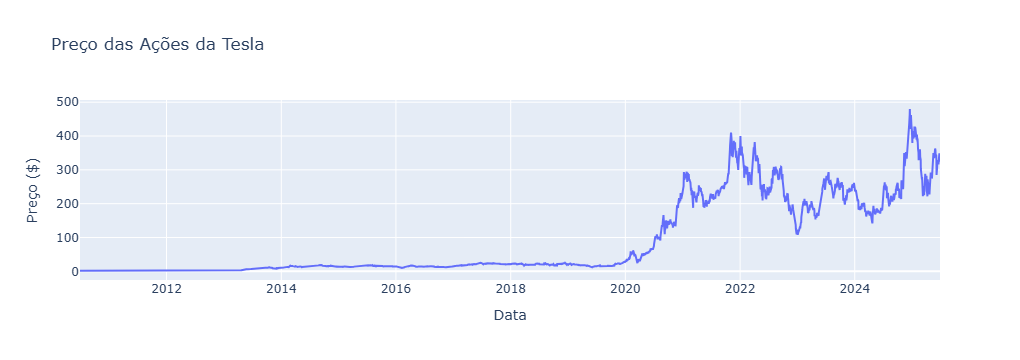

NameError: name 'tesla_revenue' is not defined

In [7]:
import plotly.graph_objs as go

# Gráfico de linha do preço das ações da Tesla
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=tesla_data['Date'], y=tesla_data['Close'], name='Preço de Fechamento (Tesla)'))
fig1.update_layout(title='Preço das Ações da Tesla', xaxis_title='Data', yaxis_title='Preço ($)')
fig1.show()

# Gráfico de barras da receita da Tesla
fig2 = go.Figure()
fig2.add_trace(go.Bar(x=tesla_revenue['Date'], y=tesla_revenue['Revenue'], name='Receita (Tesla)'))
fig2.update_layout(title='Receita Trimestral da Tesla', xaxis_title='Data', yaxis_title='Receita ($)')
fig2.show()


In [ ]:
# Gráfico de linha do preço das ações da GameStop
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=gme_data['Date'], y=gme_data['Close'], name='Preço de Fechamento (GameStop)'))
fig3.update_layout(title='Preço das Ações da GameStop', xaxis_title='Data', yaxis_title='Preço ($)')
fig3.show()

# Gráfico de barras da receita da GameStop
fig4 = go.Figure()
fig4.add_trace(go.Bar(x=gme_revenue['Date'], y=gme_revenue['Revenue'], name='Receita (GameStop)'))
fig4.update_layout(title='Receita Trimestral da GameStop', xaxis_title='Data', yaxis_title='Receita ($)')
fig4.show()
